# Майнор по Анализу Данных, Группа ИАД-4
## 30/11/2017 Проверка гипотез

In [23]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

**Возьмем [данные](https://figshare.com/articles/Height_of_ice_hockey_players/3394735/2) из [этой](https://habrahabr.ru/post/301340/) статьи на Хабре.**

In [24]:
hockey_data = pd.read_csv('/Users/maxim_anisimov/Desktop/ML_data/hockey_players.csv', 
                          index_col=0, encoding='LATIN1')

In [25]:
hockey_data.shape

(6292, 12)

In [26]:
hockey_data.head()

,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
year,,,,,,,,,,,,
2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


**Гистограммы роста и веса хоккеистов**

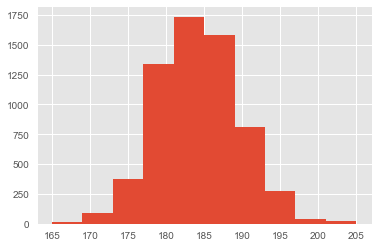

In [27]:
hockey_data['height'].hist();

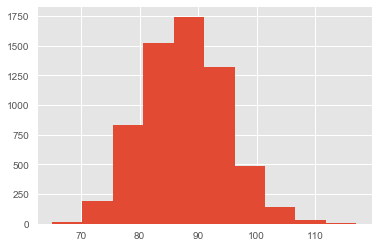

In [28]:
hockey_data['weight'].hist();

**Проверим, отличается ли средний рост хоккеистов значимо от 177.6 см  – среднего мужского роста по Европе за 2001-2012 ([Вики](https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide#cite_note-role_of_nutrition_and_genetics-13)), а средний вес – от 81.9 кг. (среднее по Швеции за 2003-2004, [Вики](https://en.wikipedia.org/wiki/Human_body_weight#cite_note-6)).**

**Для использования критерия Стьюдента сначала убедимся, что данные хорошо описываются нормальным распределением.**

**Постройте [QQ-график](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) для роста хоккеистов (метод stats.probplot).**

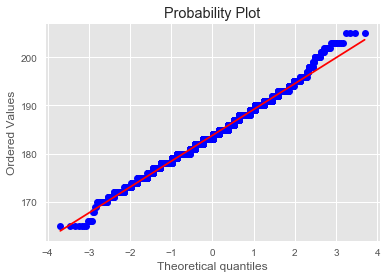

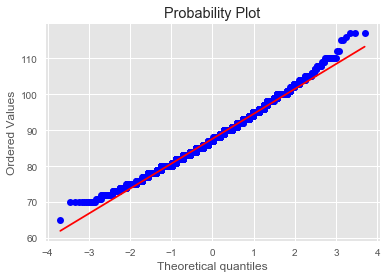

In [29]:
# проверим рост
fig, ax = plt.subplots(1,1)
qq, line = stats.probplot(hockey_data.height, plot=ax)

# проверим вес
fig, ax = plt.subplots(1,1)
qq, line = stats.probplot(hockey_data.weight, plot=ax)


Теперь можно пробовать статистические тесты

**Постройте 95% доверительные интервалы для роста и веса хоккеистов на основе нормального распределения по правилу 2 сигм.**

In [30]:
from statsmodels.stats.weightstats import *

In [31]:
from statsmodels.stats.weightstats import _zconfint_generic
from statsmodels.stats.weightstats import _tconfint_generic

In [36]:
_tconfint_generic(hockey_data.height.mean(), hockey_data.height.std(ddof=1)/len(hockey_data), 
                  dof=len(hockey_data)-1, alpha=0.05, 
                  alternative='two-sided')

(183.80982927562118, 183.81318407466492)

In [37]:
_tconfint_generic(hockey_data.weight.mean(), hockey_data.weight.std(ddof=1)/len(hockey_data), 
                  dof=len(hockey_data)-1, alpha=0.05, 
                  alternative='two-sided')

(87.619492757071995, 87.623832099889214)

## Одновыборочный критерий Стьюдента

**Проверьте с помощью t-критерия Стьюдента, что средний рост хоккеистов отличается от 177.6 см, а средний вес – от 81.9 кг. (среднее по Швеции за 2003-2004). Метод stats.ttest_1samp**

In [38]:
stats.ttest_1samp(hockey_data.height.values, 177.6) # values - giving a massif

Ttest_1sampResult(statistic=91.516149651815283, pvalue=0.0)

**Проверьте с помощью t-критерия Стьюдента, отличается ли средний вес хоккеистов значимо от среднего мужского веса по США за 2003-2006 – от 88.3 кг.**

In [39]:
stats.ttest_1samp(hockey_data.weight.values, 88.3)

Ttest_1sampResult(statistic=-7.7266137876090619, pvalue=1.2773442042988452e-14)

## Двухвыборочный критерий Стьюдента (независимые выборки)

**Нарисуйте на одной картинке 3 гистограммы распределения веса – для вратарей, защитников и нападающих. Используйте параметры color и alpha (прозрачность), чтоб гистограммы можно было различить.**

In [40]:
hockey_data.position.value_counts()

F    3495
D    2035
G     762
Name: position, dtype: int64

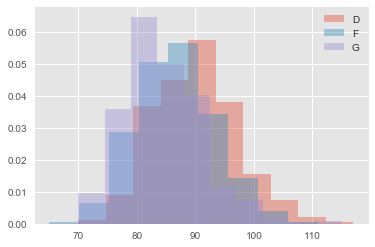

In [53]:
for i, group in hockey_data.groupby('position'):
    plt.hist(group.weight, normed=True, label=i, alpha=0.4)

plt.legend()

**Также постройте boxplot со статистиками сразу трех распределений (указанных выше), это можно сделать одной командой.**

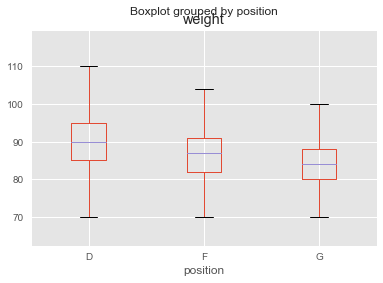

In [54]:
hockey_data.boxplot(column='weight', by='position')

**Проверьте гипотезы, что средний вес защитников выше, чем у вратарей и нападающих. Метод stats.ttest_ind**

In [55]:
stats.ttest_ind(hockey_data['weight'][hockey_data['position'] == 'D'],
                     hockey_data['weight'][hockey_data['position'] == 'F'])

Ttest_indResult(statistic=17.119397422055677, pvalue=4.6521208815554334e-64)

#### Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.